# Part 5 - Saving, updating and exporting the map widget

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Saving-a-web-map" data-toc-modified-id="Saving-a-web-map-1">Saving a web map</a></span></li><li><span><a href="#Updating-a-web-map" data-toc-modified-id="Updating-a-web-map-2">Updating a web map</a></span></li><li><span><a href="#Export-live-map-in-a-separate-HTML-file" data-toc-modified-id="Export-live-map-in-a-separate-HTML-file-4">Export live map in a separate HTML file</a></span></li><li><span><a href="#Rendering-Web-Map-items-on-a-Map-object" data-toc-modified-id="Rendering-Web-Map-items-on-a-Map-object-5">Rendering Web Map items on a Map object</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6">Conclusion</a></span></li></ul></div>

## Saving a web map

Starting with the Python API version 1.3, you can save the map widget as a web map in your `GIS`. This process persists the basemaps, layers added (with or without your custom symbology, including smart mapping), pop-ups, extent, and graphics drawn (with or without custom symbols) as layers in your `web map`.

To save the map, call the `save()` method. This method creates and returns a new `Web Map Item` object. As parameters, you can specify all valid Item properties as shown below:

In [1]:
from arcgis.gis import GIS
from arcgis.map import Map
gis = GIS(profile="your_online_profile")

In [2]:
world_countries_item = gis.content.get('ac80670eb213440ea5899bbf92a04998')
world_countries_layer = world_countries_item.layers[0]
world_countries_layer

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">


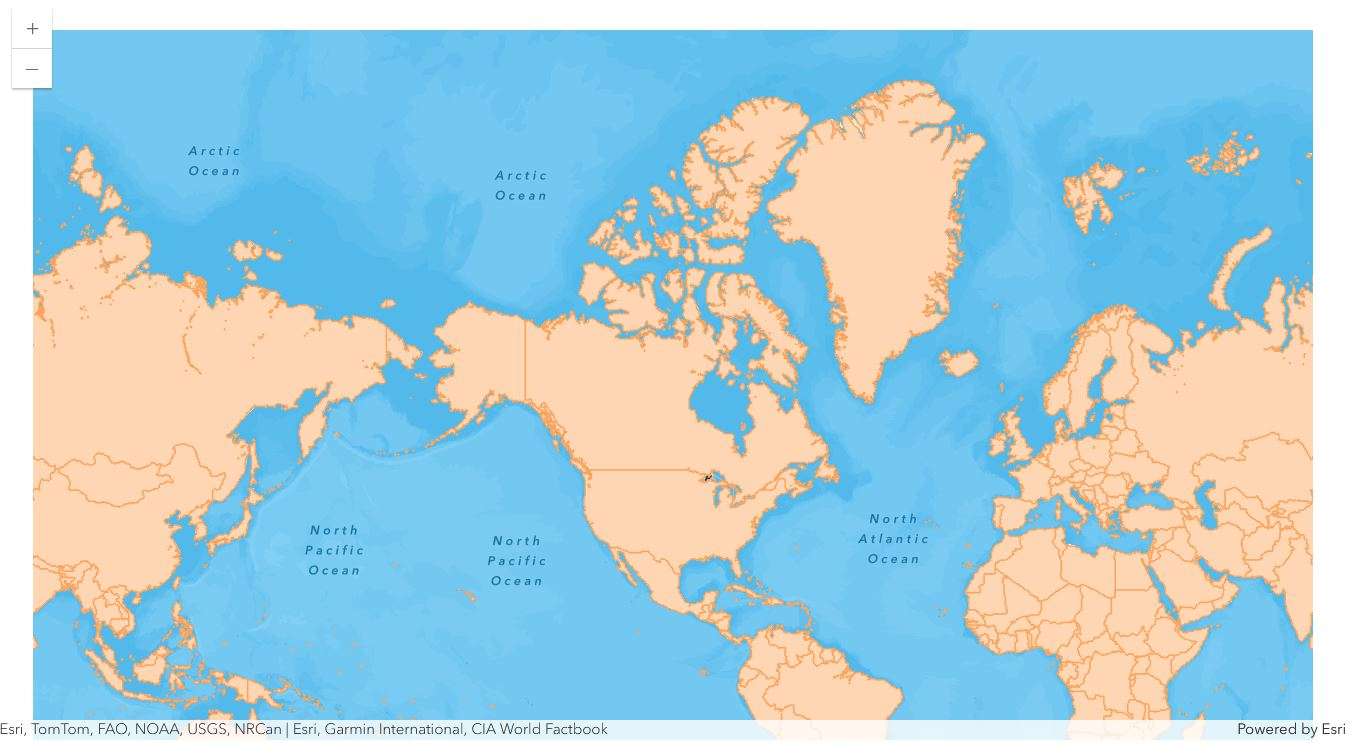

In [5]:
map1 = gis.map("USA")
map1

In [6]:
map1.content.add(world_countries_layer)

In [7]:
webmap_properties = {'title':'World Countries 2024-September',
                     'snippet': 'Jupyter notebook widget saved as a web map',
                     'tags':['automation', 'python']}

webmap_item = map1.save(webmap_properties, thumbnail=r".\webmap_thumbnail.PNG")
print(webmap_item)

<Item title:"World Countries 2024-September" type:Web Map owner:arcgis_python>


## Updating a web map

Similarly, if you created the `Map` object from an existing web map item, you can call the `update()` method to update it.

Note, the `save()` method always creates a new item with an updated web map definition, so this is a great way to create a copy of an existing web map. For instance, the cell below calls the `save()` method and creates a new web map item with the new set of layers, without disturbing the original web map item.

We can search for web maps just like any other item:

<Item title:"02 Snow routes for first responders" type:Web Map owner:EsriTrainingSvc>
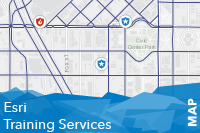

In [8]:
webmap_search = gis.content.search("Snow routes for first responders", item_type="Web Map", outside_org=True)
snow_routes_item = webmap_search[0]
snow_routes_item

You can also create a `Map` object from an existing web map item by passing the web map item as the parameter to the constructor:

In [9]:
snow_routes_map = Map(snow_routes_item)
for layer in snow_routes_map.content.layers:
    print(layer.properties['name'])

Snow Routes
Fire Stations
Police Stations


You can update a web map by adding or removing layers. For instance, the cell below removes one of the layers from the web map and adds a different layer.

In [29]:
# remove the first - unclassed layer from the map
snow_routes_map.content.remove(1)

True

In [30]:
snow_routes_map.content.add(world_countries_layer, options={'title':'World Countries'})

In [32]:
for layer in snow_routes_map.content.layers:
    print(layer.properties['name'])

Snow Routes
Police Stations
World_Countries


Next, let's add a layer to the existing `map1` and update the web map item:

In [33]:
from arcgis.features import FeatureLayer
map1.content.add(FeatureLayer("https://services.arcgis.com/ue9rwulIoeLEI9bj/arcgis/rest/services/Snow_routes_for_first_responders_WFL1/FeatureServer/1"), )

for layer in map1.content.layers:
    print(layer)

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">
<FeatureLayer url:"https://services.arcgis.com/ue9rwulIoeLEI9bj/arcgis/rest/services/Snow_routes_for_first_responders_WFL1/FeatureServer/1">


Using the `save` method will create a new web map item, while using the `update` method will make updates to the previous web map item:

```
update(item_properties=None, thumbnail=None, metadata=None)
```
The `update` method uses the following parameters:

        ---------------     --------------------------------------------------------------------
        item_properties     Optional dictionary. See table below for the keys and values.
        ---------------     --------------------------------------------------------------------
        thumbnail           Optional string. Either a path or URL to a thumbnail image.
        ---------------     --------------------------------------------------------------------
        metadata            Optional string. Either a path or URL to the metadata.
        ---------------     --------------------------------------------------------------------
        
The `update` method will update the Web Map item that was used to create the `Map` object. In addition, you are also able to update the item's other properties, thumbnail, and metadata. Please review the `Scene.update()` method within the [Scene class](https://developers.arcgis.com/python/latest/api-reference/arcgis.map.toc.html#arcgis.map.Scene.update) to update a Scene item.

In [34]:
webmap_item_properties = {'title':'Fire Stations in Denver',
                          'snippet':'Map created using Python API showing fore stations in Denver against the world map',
                          'tags':['automation', 'safety', 'python']}

new_map_item = map1.update(item_properties = webmap_item_properties, 
                           thumbnail='./webmap_thumbnail.png')
print(new_map_item)

True


In [35]:
# We can see from the output that the title is being updated:
print(webmap_item)

<Item title:"Fire Stations in Denver" type:Web Map owner:arcgis_python>


## Export live map in a separate HTML file

Another new feature in 1.5.0 is the ability to export the current widget as a stand-alone HTML file. This added functionality provides a new workflow for creating standalone HTML maps that can be shared with anyone. All they need is a web browser!

The cell below will write the current widget to the file specified by a string path. Run the cell, find the file on your disk, and open it in your favorite web browser.

<div class="alert alert-info">
  <b>Note:</b> By default, only publicly accessible layers will show on the exported HTML maps. You must specify that `credentials_prompt=True` to allow users to authenticate to the GIS to view private layers. See the API reference for more information.
</div>

In [19]:
import os

file_dir = os.path.join(os.getcwd(), 'home')
if not os.path.isdir(file_dir):
    os.mkdir(file_dir)
    
file_path = os.path.join(file_dir, 'myWorldMap.html')

map1.export_to_html(file_path)
print("html saved as " + file_path) 

html saved as D:\Projects\arcgis-python-api\guide\10-mapping-and-visualization\home\myWorldMap.html


## Rendering Web Map items on a Map object

<div class="alert alert-info">
  <b>Note:</b> This is the first iteration of the new map widget and some backward compatability issues with rendering maps built against a previous version of the JSAPI can be expected. In order to resolve such issues, please open the map in the Map Viewer, and re-save it. This will make necessary updates to the JS specs of your map, in order to render them without errors.
</div>


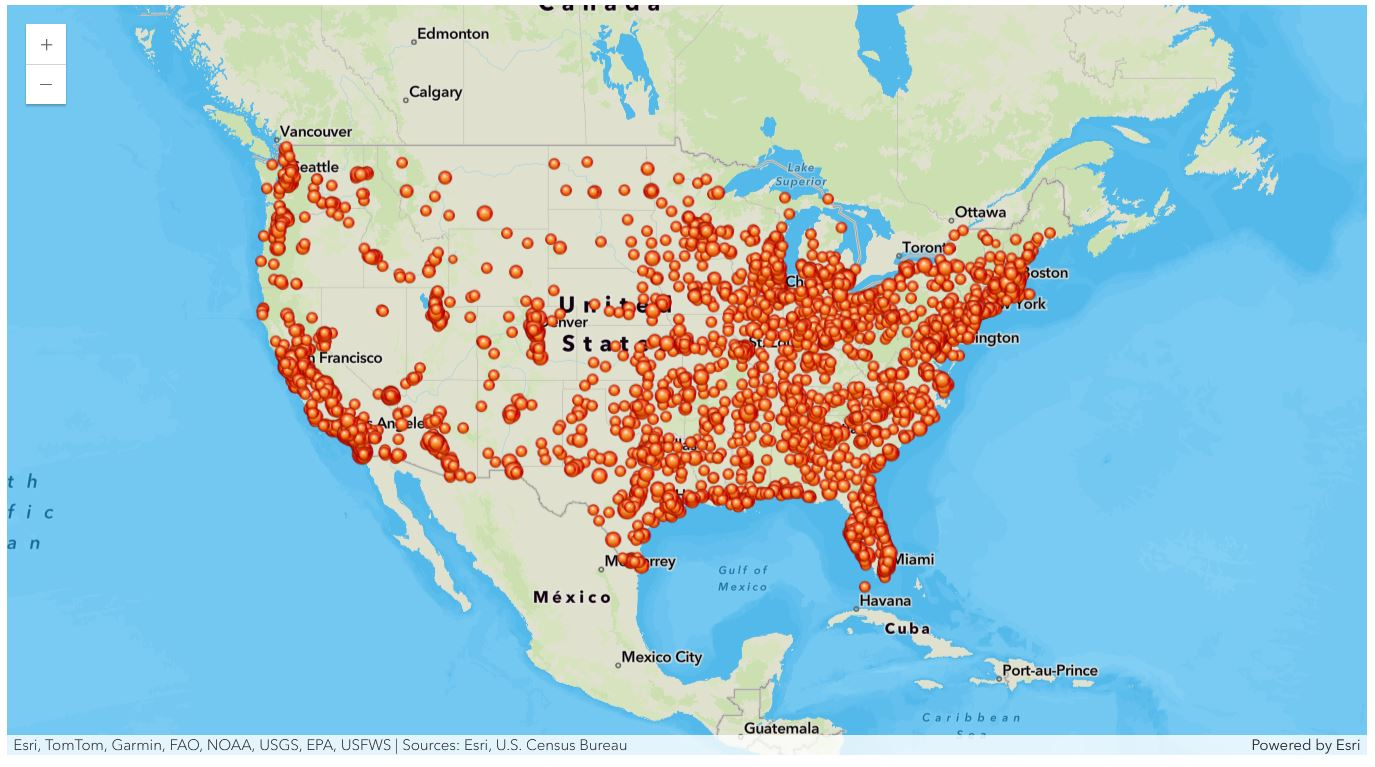

In [39]:
map2 = gis.map("USA")
map2

In [37]:
census_item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
census_flayer = census_item.layers[0]

In [38]:
map2.content.add(census_flayer)

## Conclusion

In Part 5 of this guide series, we observed how to consume web maps and web scenes and how to update them. During this process, the examples demonstrated how to modify the map widget using code, how to make copy of an existing item into your account, how to look for basemaps, and how to update layer properties within a web map.

<a href="#Part-5---Saving,-embedding-and-exporting-the-map-widget">Back to Top</a>